# ========================================================================================
# 2m_project_6
# ========================================================================================

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
ads = pd.read_csv(r'C:\Simulation\data\6_ads_data.csv', parse_dates=['date', 'time'])

In [4]:
ads = pd.read_csv(r'F:\!PR\Simulation\data\ads_data.csv', parse_dates=['date', 'time'])

In [3]:
ads.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [ ]:
ads.info()

In [ ]:
ads.describe(include='all')

In [6]:
ads_clients = pd.read_csv(r'C:\Simulation\data\6_ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [5]:
ads_clients = pd.read_csv(r'F:\!PR\Simulation\data\ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [7]:
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [ ]:
ads_clients.info()

In [ ]:
ads_clients.describe(include='all')

Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.
Могут понадобиться:  
•	pivot()  
•	fillna()

In [10]:
ads.groupby(['ad_id', 'event'], as_index=False).size()

,ad_id,event,size
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [20]:
event_pivot = ads.groupby(['ad_id', 'event'], as_index=False)\
    .size()\
    .pivot(index='ad_id', columns='event', values='size')\
    .fillna(0)

In [21]:
event_pivot

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [22]:
event_pivot.mean().round(0)

event
click    113.0
view     923.0
dtype: float64

Давайте посмотрим на распределение показов объявлений!  
•	По оси x – число показов  
•	По оси y – доля объявлений с такими показами  
Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.  
Для такого же отображения используйте эти настройки  
sns.set(  
    font_scale=2,  
    style="whitegrid",  
    rc={'figure.figsize':(20,7)}  
        )  
Могут пригодиться:  
•	sns.distplot  
•	np.log

In [23]:
sns.set_theme(
    context="notebook",
    style="whitegrid",
    font_scale=2,
    rc={'figure.figsize': (20, 7)}
)

In [24]:
view_counts = ads[ads['event'] == 'view'].groupby('ad_id').size()

In [25]:
view_counts.head()

ad_id
2       101
3       184
1902     41
2064     35
2132     58
dtype: int64

In [26]:
log_view_counts = np.log(view_counts+1)

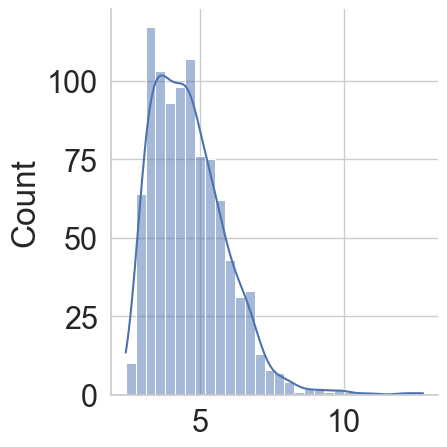

In [27]:
sns.displot(log_view_counts, kde=True)

<Axes: ylabel='Density'>

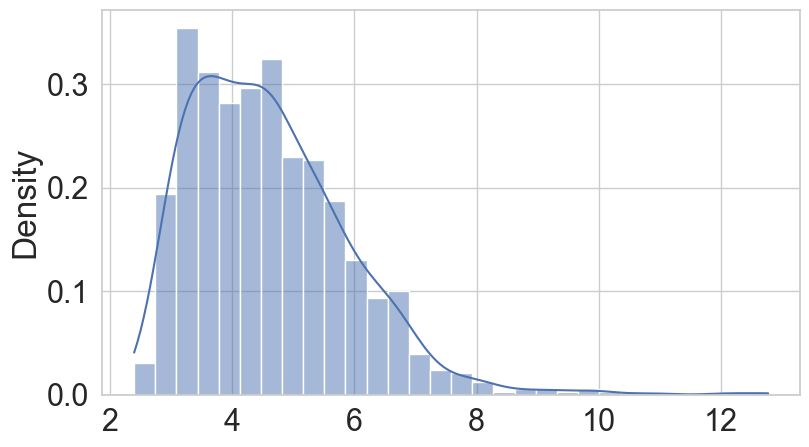

In [28]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.histplot(data=log_view_counts, kde=True, stat='density', ax=ax)

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.  
Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.  
Могут пригодиться:  
•	pivot()  
•	скользящее среднее

In [31]:
view_counts= ads.loc[ads.event == 'view']\
    .groupby(['date', 'ad_id'])\
    .size()\
    .reset_index(name='view_count')

In [32]:
view_counts.head()

,date,ad_id,view_count
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17


In [33]:
daily_avg_views = view_counts.groupby('date')['view_count'].mean()

In [34]:
daily_avg_views.head()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
Name: view_count, dtype: float64

In [37]:
rolling_avg = daily_avg_views.rolling(window=2).mean()

In [21]:
rolling_avg.head()

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
Name: view_count, dtype: float64

In [38]:
round(rolling_avg['2019-04-06'])

598

In [40]:
daily_ad_views = ads.loc[ads.event == 'view'].pivot_table(index='ad_id', columns='date', values='time', aggfunc='count')

In [41]:
daily_ad_views.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [42]:
mean_views = daily_ad_views.mean()

In [43]:
mean_views.head()

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
dtype: float64

In [ ]:
# альтернативный вариант, чисто по-фану
ads.query('event == "view"').groupby(['date', 'ad_id']).agg({'time': 'count'}).reset_index().pivot_table(index='ad_id', columns='date', values='time').reset_index().mean()

date
ad_id                  57756.006276
2019-04-01 00:00:00      154.482270
2019-04-02 00:00:00      137.786982
2019-04-03 00:00:00      163.952778
2019-04-04 00:00:00      675.901720
2019-04-05 00:00:00      919.109677
2019-04-06 00:00:00      277.122727
dtype: float64

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).  
Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd  
Пример ответа:  
2020-12-31
Могут пригодиться:  
•	sns.lineplot()  
•	скользящее среднее  
•	значение по модулю

In [61]:
daily_avg_views_df = daily_avg_views.reset_index()

In [62]:
rolling_avg_df = rolling_avg.reset_index()

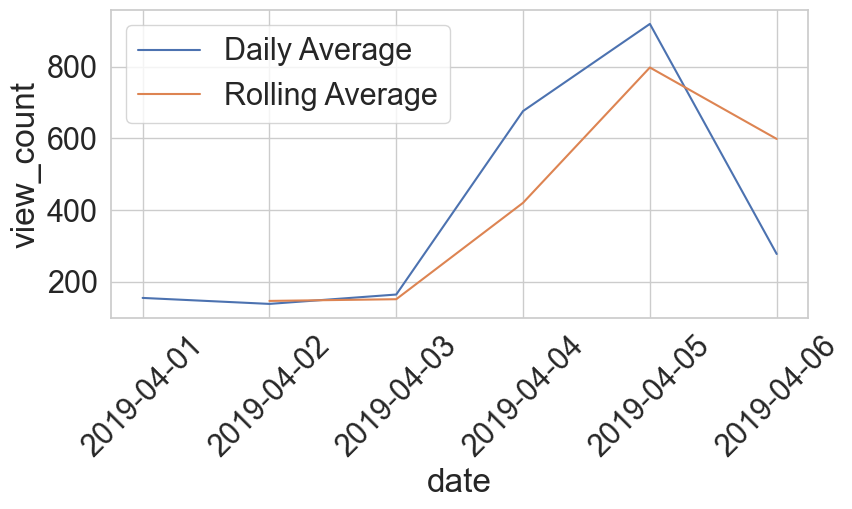

In [63]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.lineplot(data=daily_avg_views_df, x='date', y='view_count', label="Daily Average")
sns.lineplot(data=rolling_avg_df, x='date', y='view_count', label="Rolling Average")
ax.tick_params(axis='x', rotation = 45)
plt.legend()

In [71]:
merged_df = pd.merge(daily_avg_views_df, rolling_avg_df, on='date', suffixes=('_daily', '_rolling'))

In [76]:
merged_df.head()

,date,view_count_daily,view_count_rolling,difference
0,2019-04-01,154.482270,NaN,NaN
1,2019-04-02,137.786982,146.134626,8.347644
2,2019-04-03,163.952778,150.869880,13.082898
3,2019-04-04,675.901720,419.927249,255.974471
4,2019-04-05,919.109677,797.505699,121.603979


In [75]:
merged_df['difference'] = (merged_df['view_count_daily'] - merged_df['view_count_rolling']).abs()

In [82]:
max_diff_date = merged_df.loc[merged_df['difference'].notna() & (merged_df['difference'] == merged_df['difference'].max()), 'date'].iloc[0]
max_diff_date.strftime('%Y-%m-%d')

'2019-04-06'

In [85]:
max_diff_index = merged_df[merged_df['difference'].notna()]['difference'].idxmax()
max_diff_date = merged_df.loc[max_diff_index, 'date']
max_diff_date.strftime('%Y-%m-%d')

'2019-04-06'

In [84]:
abs_diff = (daily_avg_views - rolling_avg).abs()
max_diff_date = abs_diff.dropna().idxmax()
max_diff_date.strftime('%Y-%m-%d')

'2019-04-06'

Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).  
В качестве ответа укажите среднее число дней.

Мой код:

In [86]:
date_ads = ads.groupby('client_union_id').agg({'date': 'min'})

In [87]:
date_ads.head()

,date
client_union_id,
1,2019-04-01
9,2019-04-03
13,2019-04-02
16,2019-04-03
20,2019-04-02


In [88]:
date_client = ads_clients[['client_union_id', 'create_date']]

In [89]:
date_client.head()

,client_union_id,create_date
0,1,2018-12-24
1,2,2019-02-10
2,3,2019-01-25
3,4,2018-12-09
4,5,2019-01-08


In [90]:
merge_date = date_ads.merge(date_client, on='client_union_id')

In [91]:
merge_date.head()

,client_union_id,date,create_date
0,1,2019-04-01,2018-12-24
1,9,2019-04-03,2018-12-10
2,13,2019-04-02,2019-01-26
3,16,2019-04-03,2018-12-19
4,20,2019-04-02,2019-03-01


In [92]:
merge_date['difference'] = merge_date['date'] - merge_date['create_date']

In [93]:
merge_date.difference.mean().days

124

Код из ответов:

In [94]:
merged = ads_clients.merge(ads, on=['client_union_id'], suffixes=('_client_data', '_ad_data'))

In [98]:
merged.head()

,date_client_data,client_union_id,community_id,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,difference
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98 days
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98 days
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98 days


In [97]:
merged['difference'] = merged.date_ad_data - merged.create_date

In [99]:
first_ad = merged.groupby('client_union_id').difference.min()

In [100]:
first_ad.mean()

Timedelta('124 days 09:04:43.532219570')

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.  
Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна 5%  
Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day')  
Ответ дайте в процентах и округлите до сотых. Пример ответа:  
34.69  
NB! У нас могут быть люди, которые не сделали рекламу вообще. Не забудьте их учесть.  

Мой код:

In [101]:
count_action_client = merge_date.loc[merge_date['difference'] < pd.Timedelta(days=365), 'client_union_id'].nunique()

In [102]:
count_client = ads_clients['client_union_id'].nunique()

In [103]:
conversion = round(count_action_client / (count_client / 100), 2)

In [104]:
conversion

0.69

Код из ответов:

In [53]:
threshold = pd.Timedelta(365, unit='day')
lt_365 = first_ad.loc[first_ad < threshold]
np.round(len(lt_365) / ads_clients.client_union_id.nunique() * 100, 2)

np.float64(0.69)

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.  
Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().  
Могут пригодиться:  
•	pd.cut()  
•	value_counts()

Мой код:

In [105]:
bins = [
    pd.Timedelta(days=0),
    pd.Timedelta(days=30),
    pd.Timedelta(days=90),
    pd.Timedelta(days=180),
    pd.Timedelta(days=365)
]
labels = ['до 30 дн.', '30-90 дн.', '90-180 дн.', '180-365 дн.']
duration_group = pd.cut(merge_date['difference'], bins=bins, labels=labels)
duration_group = duration_group.value_counts()
duration_group

difference
90-180 дн.     396
30-90 дн.      263
180-365 дн.    168
до 30 дн.       11
Name: count, dtype: int64

И последнее задание: постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

In [58]:
px.bar(duration_group)